---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Segundo ciclo del 2022

---

[comment]: <> (Modificar esta sección con datos personales)

* Estudiante: **Dualok Fonseca Monge**
* Carné: **B42629**
* Grupo: **1/2/3**

# `P1` - *Introducción a Python*

> Este es un ejercicio de introducción a Python como lenguaje para computación científica y cálculo numérico. Estas mismas herramientas (y otras) serán fundamentales en el resto del curso para apoyar la solución de problemas de la teoría de probabilidad.

**Nota**: Es recomendable revisar los tutoriales `Py0`, `Py1` y `Py2` (disponibles [aquí](https://github.com/fabianabarca/mpss)) para conocer las bases de Python útiles en la ejecución de este laboratorio.

---

---
## Problema

El documento `compras.csv` describe las compras de $N$ clientes que entraron a una pequeña tienda que vende solamente cuatro productos: A, B, C y D. En esta tabla, los clientes están numerados del 1 al $N$ y en la $n$-ésima fila las columnas "A", "B", "C" y "D" tienen un 1 cuando la persona compró el producto o un 0 cuando no. Por ejemplo:

| Cliente | A | B | C | D |
|---------|---|---|---|---|
| 1       | 0 | 1 | 0 | 1 |
| 2       | 1 | 0 | 1 | 0 |
| 3       | 0 | 0 | 0 | 0 |
| 4       | 0 | 1 | 1 | 0 |

### Asignaciones

1. [15%] Importar los datos y encontrar la frecuencia relativa de compra de cada producto (porcentaje de clientes que compraron cada producto).

2. [10%] Crear una gráfica de barras, donde la altura de cada barra representa la cantidad de compras de cada producto. Por ejemplo:
<img src="https://matplotlib.org/stable/_images/sphx_glr_bar_001.png" width="200px">

> Nota: la gráfica y sus ejes deben estar rotulados.

3. [20%] Encontrar la frecuencia relativa de todas las combinaciones de los cuatro productos vendidos. Por ejemplo: un cliente que compra todos los productos (1, 1, 1, 1) es una combinación, un cliente que solamente compra el producto C (0, 0, 1, 0) es otra combinación.

4. [10%] Crear una gráfica de frecuencia relativa donde muestre las ocurrencias de cada combinación, encontradas en el inciso anterior.

5. [30%] Encontrar la probabilidad de las uniones de dos conjuntos y tres conjuntos, asignados para cada persona por la función `asignacion()`. Por ejemplo: $P(A \cup B)$ y $P(A \cup B \cup C)$. Especificar las ecuaciones utilizadas, si fue el caso.

7. [15%] Si un cliente compró el producto P1, ¿cuál es la probabilidad de haber comprado también el producto P2? Donde P1 y P2 son asignados con la función `asignacion()`.

#### Función de asignación

Ejemplo: si el carné es B12345, utilizar la parte numérica como argumento de la función, es decir: `asignacion(12345)`. Esto va a generar resultados aleatorios pero fijos, o sea, que serán los mismos aun cuando se ejecute varias veces el programa.

In [10]:
import random

def asignacion(digitos):
    '''Función que asigna dos combinaciones
    de dos y tres conjuntos a cada persona
    con base en los dígitos de su carné.
    '''
    opciones = ('A', 'B', 'C', 'D')
    random.seed(digitos)
    A1, A2 = random.sample(opciones, k=2)
    B1, B2, B3 = random.sample(opciones, k=3)
    P1, P2 = random.sample(opciones, k=2)
    print('Asignación:\nP({} u {})\nP({} u {} u {})\nP1 = {}, P2 = {}'.format(A1, A2, B1, B2, B3, P1, P2))
    return

# Llamar la función con los dígitos numéricos del carné
asignacion(42629)

Asignación:
P(C u D)
P(D u A u B)
P1 = B, P2 = A


---
**Forma de entrega**

- Puede utilizar este archivo `.ipynb` como base.
- Recuerde convertir el archivo con su *solución comentada* para entregarlo en formato HTML (para visualizar en web), en **File > Download as > HTML (.html)** y ponerle el nombre `[carné].html` (ejemplo: B12345.html).

### Soluciones

#### Ejercicio 1:

Utilizando la biblioteca pandas tanto para leer el archivo.csv como para operar en los datos se crean dataframes de cada columna y se calculan las frecuencias relativas de compra de cada producto. La función `relative_freq()` retorna una lista con la cantidad de compras por producto para ser utilizada en el punto 2

En estadistica la frecuencia relativa $f_r$ se obtiene dividiendo la frecuencia absoluta $f_a$ de una muestra entre el total de valores $N$ de la muestra, es decir:

$$f_r = \frac{f_a}{N}$$



In [11]:
import csv
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt


def relative_freq() -> list:
    """
    Asignacion: 1
    Calcula las frecuencias relativas en el archivo.csv
    return: Una lista con las cantidad de compras por producto
    """
    # Se leen los datos del archivo.csv con la funcion de pandas read_csv
    # Se guardan los datos en la variable data
    data = pd.read_csv(r'compras.csv')
    # Se crea un objeto tipo DataFrame de pandas para cada columna
    data_frame_a = pd.DataFrame(data, columns=['A'])
    data_frame_b = pd.DataFrame(data, columns=['B'])
    data_frame_c = pd.DataFrame(data, columns=['C'])
    data_frame_d = pd.DataFrame(data, columns=['D'])
    '''Se calcula la frecuencia de aparición de cada elemento
    utilizando la función value_counts'''
    # Se usa sort = false para no ordenarlos por cantidad de apariciones
    # Se utiliza normalize para calcular la frecuencia relativa directamente
    a_relative_f = data_frame_a['A'].value_counts(normalize=True, sort=False)
    b_relative_f = data_frame_b['B'].value_counts(normalize=True, sort=False)
    c_relative_f = data_frame_c['C'].value_counts(normalize=True, sort=False)
    d_relative_f = data_frame_d['D'].value_counts(normalize=True, sort=False)
    '''las variables count cuentan la cantidad de veces que se repite
    un elemento en cada columna''' 
    a_count = data_frame_a['A'].value_counts(sort=False)
    b_count = data_frame_b['B'].value_counts(sort=False)
    c_count = data_frame_c['C'].value_counts(sort=False)
    d_count = data_frame_d['D'].value_counts(sort=False)
    purchase_amount = [a_count[1], b_count[1], c_count[1], d_count[1]]
    # Las frecuencias relativas se reciben como un arreglo
    # a_relative_f[0] contiene la frecuencia relativa de la no compra(0)
    # a_relative_f[1] contiene la frecuencia relativa de la compra (1)
    relative_frequencies = \
        [a_relative_f[1], b_relative_f[1], c_relative_f[1], d_relative_f[1]]
    print("Frecuencias relativas - A: {} B: {} C: {} D: {}"
          .format(relative_frequencies[0], relative_frequencies[1],
                  relative_frequencies[2], relative_frequencies[3]))
    return purchase_amount


# Se llaman las funciones    
purchase_amount = relative_freq()
#bar_graph(purchase_amount)

Frecuencias relativas - A: 0.67 B: 0.196 C: 0.596 D: 0.392


#### Ejercicio 2:

Para graficar la cantidad A, B, C, D de productos comprados se utiliza la biblioteca matplotlib, utilizando la lista creada en la función `relative_freq()` del primer punto punto 1

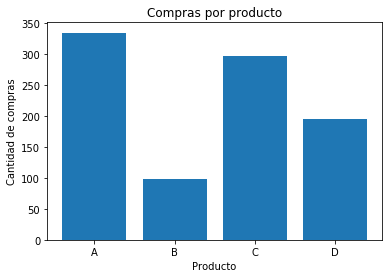

In [12]:
def bar_graph(purchase_amount: list) -> None:
    """
    Asignación: 2
    Realiza un gráfico de barras a partir de una lista
    de frecuencias relativas
    param purchase_amout: lista con la cantidad de compras por producto
    """
    # Agrega la lista de frecuencias relativas y los índices a la figura
    index = ['A', 'B', 'C', 'D']
    plt.bar(index, purchase_amount)
    plt.title("Compras por producto")
    plt.xlabel("Producto")
    plt.ylabel("Cantidad de compras")
    # Se muestra la figura graficada
    plt.show()
    
    
# Se llaman las funciones    
bar_graph(purchase_amount)    

#### Ejercicio 3:

Para obtener la frecuencia relativa de combinaciones de compra por cliente, se hace uso de la biblioteca `csv` para leer el `compra.csv` y se utiliza lógica normal de python para acceder a los datos. La idea detrás de esta solución es obtener la combinación de productos de compra por cada fila(persona) y tratar a cada combinación como un número binario, donde dicho número es el índice de una lista `frequencies` donde se cuenta la cantidad de aparición por cada combinación. Es decir si un cliente compra los productos A y D (1, 0, 0, 1), entonces esta combinación tiene como indice un 9, como se muestra en la siguiente tabla:

| Índice | A | B | C | D |
|--------|---|---|---|---|
| 0      | 0 | 0 | 0 | 0 |
| 1      | 0 | 0 | 0 | 1 |
| 2      | 0 | 0 | 1 | 0 |
| 3      | 0 | 0 | 1 | 1 |
| 4      | 0 | 1 | 0 | 0 |
| 5      | 0 | 1 | 0 | 1 |
| 6      | 0 | 1 | 1 | 0 |
| 7      | 0 | 1 | 1 | 1 |
| 8      | 1 | 0 | 0 | 0 |
| 9      | 1 | 0 | 0 | 1 |
| 10     | 1 | 0 | 1 | 0 |
| 11     | 1 | 0 | 1 | 1 |
| 12     | 1 | 1 | 0 | 0 |
| 13     | 1 | 1 | 0 | 1 |
| 14     | 1 | 1 | 1 | 0 |
| 15     | 1 | 1 | 1 | 1 |


In [13]:
def combination_relative_freq(filepath: str) -> list:
    """
    Asignación: 3
    Calcula las frecuencias relativas de cada combinación de
    compra por cliente
    """
    # Cantidad de combinaciones
    combinations = 16
    # Lista con la cantidad de apariciones de cada combinación
    frequencies = [0]*combinations
    # Números enteros con la combinación de productos comprados
    producto_a, producto_b, producto_c, producto_d = 0, 0, 0, 0
    '''Num es un número para indicar la combinación
    donde A es el bit mas significativo y D el menos significativo'''
    num = 0
    # total es la cantidad de personas que compraron los productos
    total = 0
    with open(filepath, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        # Se lee cada fila en el csv
        for row in reader:
            # se separan los elementos por ','
            elements = row[0].split(',')
            # ignoramos la primer línea
            if (elements[0] == "Cliente"):
                pass
            else:
                producto_a, producto_b = int(elements[1]), int(elements[2])
                producto_c, producto_d = int(elements[3]), int(elements[4])
                total += 1  # Se aumenta el total de elementos
                # Se opera sobre los productos como con un número binario
                num = producto_d + 2*producto_c + 4*producto_b + 8*producto_a
                # Se aumenta la frecuencia de esa combinación
                frequencies[num] += 1
    for i in range(len(frequencies)):
        frequencies[i] /= total
    print("Frecuencias relativas por combinación: \n", frequencies)
    return frequencies


# Se llaman las funciones
combination_frequencies = combination_relative_freq('compras.csv')

Frecuencias relativas por combinación: 
 [0.07, 0.058, 0.106, 0.038, 0.014, 0.008, 0.022, 0.014, 0.106, 0.092, 0.206, 0.128, 0.036, 0.02, 0.048, 0.034]


#### Ejercicio 4:

Para este ejercicio, se grafican las frecuencias relativas por combinacion utilizando las bibliotecas `pandas` y `matplotlib`

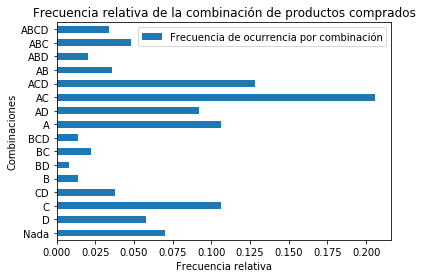

In [14]:
def combination_bar_graph(combination_frequencies: list) -> None:
    """
    Asignación: 4
    Realiza un gráfico de barras a partir de una lista
    de frecuencias relativas
    param cantidad_compras: lista con la cantidad de compras por producto
    """
    titulo = "Frecuencia relativa de la combinación de productos comprados"
    # Se crean los indices de combinaciones
    index = ['Nada', 'D', 'C', 'CD', 'B', 'BD', 'BC', 'BCD',
             'A', 'AD', 'AC', 'ACD', 'AB', 'ABD', 'ABC', 'ABCD']
    ''' Agrega la lista de frecuencias relativas de ocurrencia de cada
    combinación y los ídices al data frame '''
    df = pd.DataFrame({'Frecuencia de ocurrencia por combinación':
                       combination_frequencies}, index=index)
    ax = df.plot.barh()
    # Se agrega la rotulacion de los ejes y se muestra la figura
    ax.set_title(titulo)
    ax.set_xlabel("Frecuencia relativa")
    ax.set_ylabel("Combinaciones")
    plt.show()


# Se llaman las funciones
combination_bar_graph(combination_frequencies)

#### Ejercicio 5:

Segun la función de`asignacion()`. Se calcula: $P(C \cup D)$ y $D \cup A \cup B)$.

#### Ejercicio 6:

Según la función `asignacion()` se tiene que $P1 = B$ y $P2 = A$, entonces la probablilidad de que un cliente compre A dado que ya compró B es $P(A|B)$

---
**Universidad de Costa Rica** | Facultad de Ingeniería | Escuela de Ingeniería Eléctrica

&copy; 2022

---